# **Task 3: To Explore Unsupervised Machine Learning.**

## **Problem Statement:**
From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

In [53]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Import Required Libraries.**

In [54]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


## **Load the Dataset**

In [55]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Sparks Intern/Task 3/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


This indicates that our data is loaded successfully.


## **Variable Identification and Data Information**

By looking at the data we say the<br>
**Numeric Variables:**
* Id
* SepalLenghtCm
* SepalWidthCm
* PetalLenghtCm
* PetalWidthCm

**Categorical Variables:**
* Species




In [56]:
# Let's get the length of the data.
data.shape

(150, 6)

The dataset contains of 150 entries(rows) and 6 columns.

In [57]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


* **Checking for missing values**

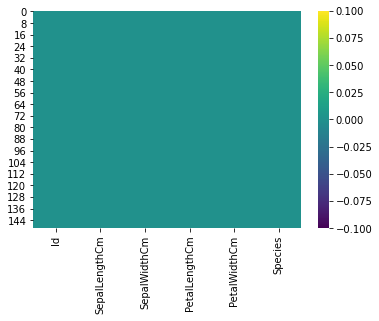

In [59]:
sns.heatmap(data.isnull(),cmap='viridis',annot= False)

**Observations:** Above figure clearly shows that the dataset does not contain any missing values.

In [60]:
#Set index as Id
data.set_index('Id',inplace = True)

## **Exploratory Data Analysis.**

**Univariate Analysis:Numeric**

CPU times: user 75.2 ms, sys: 0 ns, total: 75.2 ms
Wall time: 75.2 ms


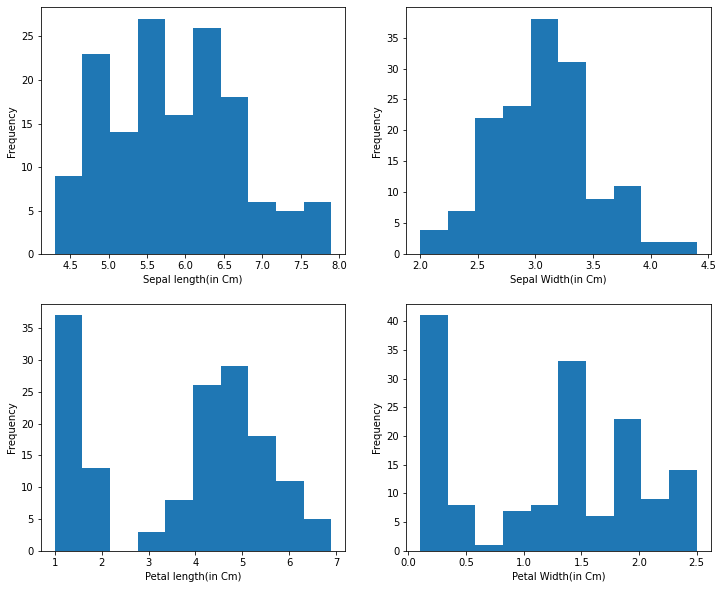

In [61]:
%%time
plt.figure(figsize = (12,10))

plt.subplot(2,2,1)
plt.hist(data['SepalLengthCm'])
plt.xlabel('Sepal length(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(data['SepalWidthCm'])
plt.xlabel('Sepal Width(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(data['PetalLengthCm'])
plt.xlabel('Petal length(in Cm)')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(data['PetalWidthCm'])
plt.xlabel('Petal Width(in Cm)')
plt.ylabel('Frequency')


**Observation:**
* Maximum data has sepal length lies between 4.5-6.5
* Most of the data points has sepal width between 2.5 to 3.5
* There are only few data points having petal length between 2-3 and of the data has petal length between 4-5-5.5 
* Petal width is not uniformly distributed.


**Univariate Analysis:Categoical**

Text(0.5, 1.0, 'Value counts \nIris-virginica     50\nIris-versicolor    50\nIris-setosa        50\nName: Species, dtype: int64')

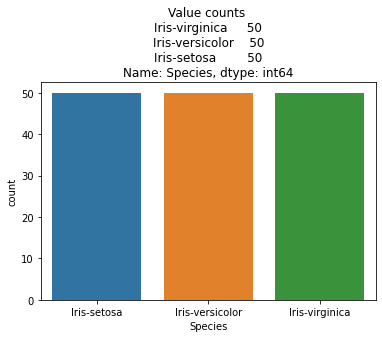

In [62]:
sns.countplot(x = data['Species'])
plt.title('Value counts \n{}'.format(data['Species'].value_counts()))

**Observations:** All the class labels have equal data points therefore this is a balanced dataset.

**Bivariate Analysis: Numeric-Numeric**

* Now let's find the correlation between the each numerical features.

In [63]:
data.corr(method = 'pearson')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


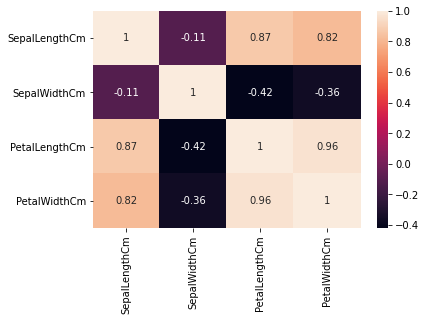

In [64]:
sns.heatmap(data.corr(method = 'pearson'),annot = True,)

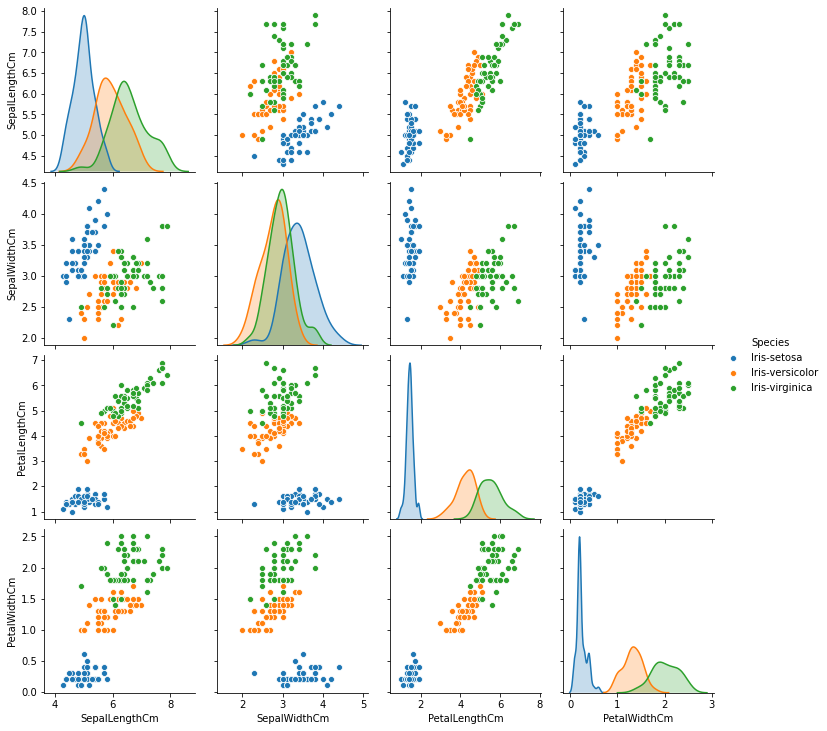

In [65]:
sns.pairplot(data, hue = 'Species',)

**Bivariate Analysis: Numerical- Categorical**

Let's plot the bar chart with of all the numeric features with categorical features

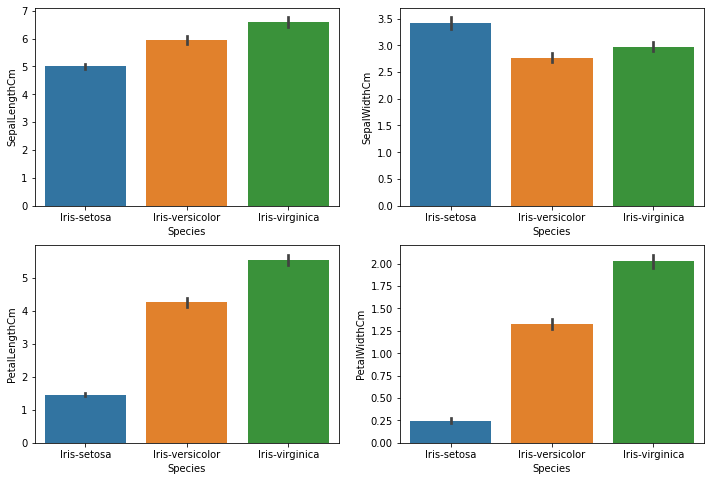

In [66]:
plt.figure(figsize = (12,8))

plt.subplot(2,2,1)
sns.barplot(x= 'Species', y = 'SepalLengthCm', data = data)

plt.subplot(2,2,2)
sns.barplot(x= 'Species', y = 'SepalWidthCm', data = data)

plt.subplot(2,2,3)
sns.barplot(x= 'Species', y = 'PetalLengthCm', data = data)

plt.subplot(2,2,4)
sns.barplot(x= 'Species', y = 'PetalWidthCm', data = data)

Observation:
* Iris-Setosa is the species who has highest sepal width but have lowest sepal lenght, petal lenght and petal width than other species. The petal lenght and petal width of this species is somewhere around 1.5cm and 0.25 cm respectively where as other species have much more than this.
* Verginica is the species which has the highest Sepal lenth, petal length and petal width. So we can conclude that the Iris-Verginica is the weighted species.

From the above plots we make one inference on the weight of the species are in the order.<br>
<center>**Iris-VerginicaWeight > Iris-VersiclorWeight > Iris-SetosaWeight**</center>

## **Clustering**
Now lets dive into the clustering i.e separating the data into different groups based on their properties.<br>
Before this we have to decide in how many groups we have to divide the data i.e finding number of clusters.


**Finding optimum number of clusters for K means.**

In [67]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


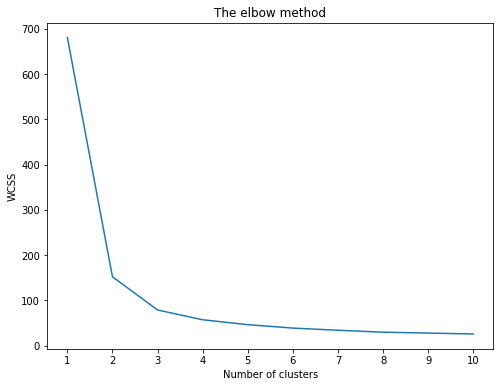

In [68]:
x = data.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.figure(figsize = (8,6))
plt.plot(np.arange(1, 11,1), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(1,11,1))
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

ou can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**<br>

Now its time to 

In [69]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [70]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [71]:
kmeans.cluster_centers_[:, 0]
kmeans.cluster_centers_[:,1]

array([3.07368421, 3.418     , 2.7483871 ])

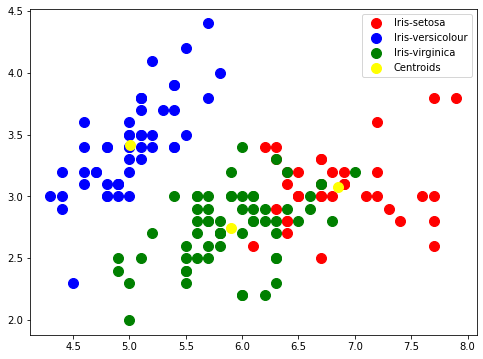

In [72]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (8,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

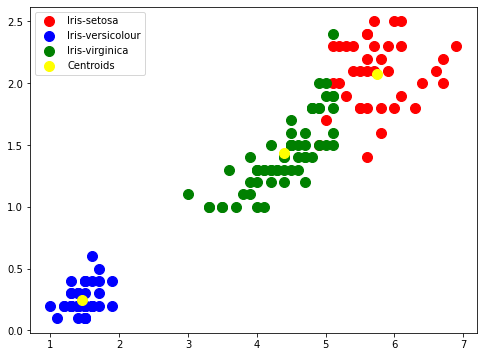

In [73]:
# Visualising the clusters - On the first two columns
plt.figure(figsize = (8,6))
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Finally, we are able to separate our data points into 3 differnet groups.


# **Thank You!**